# Project -- LendingClub

## The Data

We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

## Our Goal
Classification using neural network and deep learning.

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan.

The "loan_status" column contains our label.

In [1]:
#Some imports of potential need.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load in feature description csv file.
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [3]:
def feature_info(feature):
    """
    Print description of certain feature.
    """
    print(data_info['Description'].loc[feature])

# Loading the data

In [4]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [5]:
df.info()
#Note there are some missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
loan_amnt               396030 non-null float64
term                    396030 non-null object
int_rate                396030 non-null float64
installment             396030 non-null float64
grade                   396030 non-null object
sub_grade               396030 non-null object
emp_title               373103 non-null object
emp_length              377729 non-null object
home_ownership          396030 non-null object
annual_inc              396030 non-null float64
verification_status     396030 non-null object
issue_d                 396030 non-null object
loan_status             396030 non-null object
purpose                 396030 non-null object
title                   394275 non-null object
dti                     396030 non-null float64
earliest_cr_line        396030 non-null object
open_acc                396030 non-null float64
pub_rec                 396030 non-nu

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


# Section 1: Exploratory Data Analysis

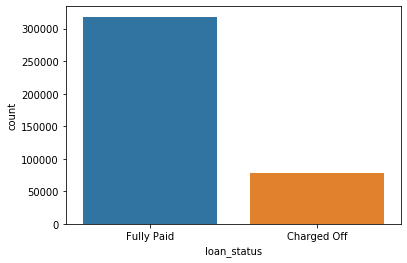

In [7]:
#Countplot of loan status (the label)
sns.countplot(x='loan_status',data=df)

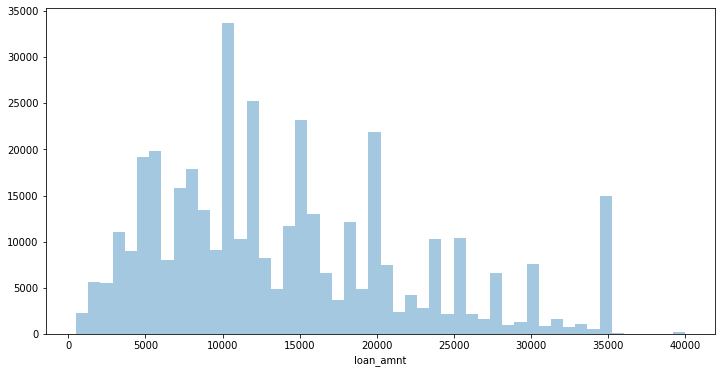

In [8]:
#Histogram of loan amount
plt.figure(figsize=(12,6))
sns.distplot(df['loan_amnt'],kde=False,bins=50)

In [9]:
#Correlation matrix
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168921,0.953929,0.336887,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
int_rate,0.168921,1.000000,0.162758,-0.056771,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.162758,1.000000,0.330381,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
annual_inc,0.336887,-0.056771,0.330381,1.000000,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
dti,0.016636,0.079038,0.015786,-0.081685,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.011649,0.188973,0.136150,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,0.060986,-0.067892,-0.013720,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408
revol_bal,0.328320,-0.011280,0.316455,0.299773,0.063571,0.221192,-0.101664,1.000000,0.226346,0.191616,0.194925,-0.124532
revol_util,0.099911,0.293659,0.123915,0.027871,0.088375,-0.131420,-0.075910,0.226346,1.000000,-0.104273,0.007514,-0.086751
total_acc,0.223886,-0.036404,0.202430,0.193023,0.102128,0.680728,0.019723,0.191616,-0.104273,1.000000,0.381072,0.042035


(12, 0)

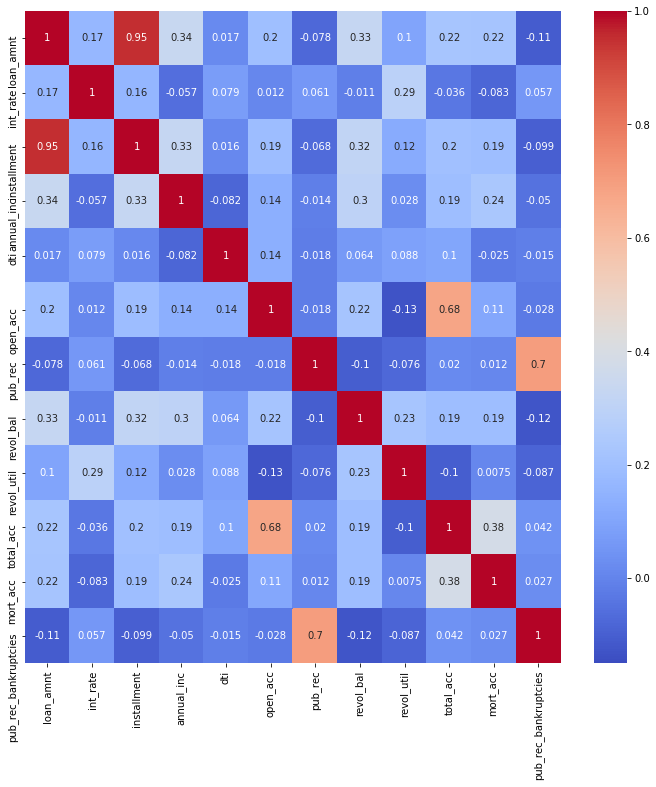

In [10]:
#Heatmap of correlation matrix
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),vmin=-0.15,vmax=1,cmap='coolwarm',annot=True)
plt.ylim(12,0)

In [11]:
#Check the feature information of 'installment', which has the highest correlation to 'loan_amnt'
feature_info('installment')
print('\n')
feature_info('loan_amnt')

The monthly payment owed by the borrower if the loan originates.


The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.


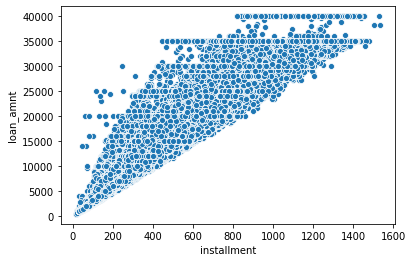

In [12]:
sns.scatterplot(x='installment', y='loan_amnt',data=df)

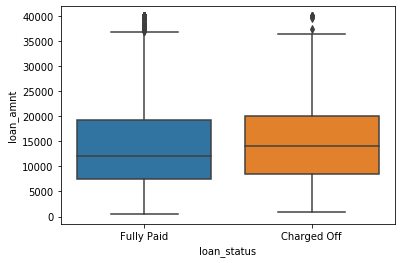

In [13]:
#Relationship between 'loan_status' and 'loan_amnt'
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
#Check the grades.
sorted_grade = sorted(df['grade'].unique())
sorted_grade

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [16]:
#Check the sub grades.
sorted_sub_grade = sorted(df['sub_grade'].unique())
sorted_sub_grade

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

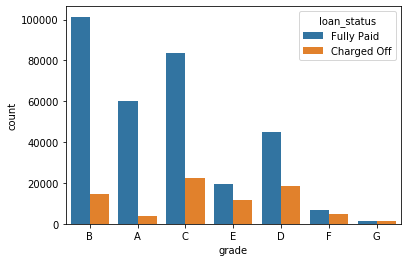

In [17]:
#Check relationship between 'grade' and 'loan_status'.
sns.countplot(x='grade',hue='loan_status',data=df)

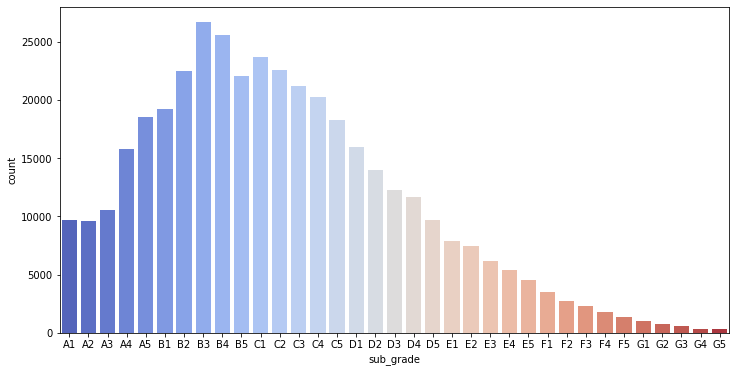

In [18]:
#Check the count of 'sub_grade'.
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,palette='coolwarm',order=sorted_sub_grade)

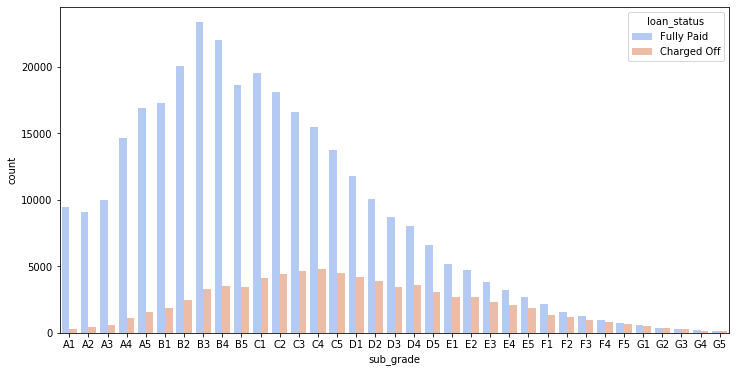

In [19]:
#Check the relationship between 'sub_grade' and 'loan_status'.
plt.figure(figsize=(12,6))
sns.countplot(x='sub_grade',data=df,palette='coolwarm',order=sorted_sub_grade,hue='loan_status')

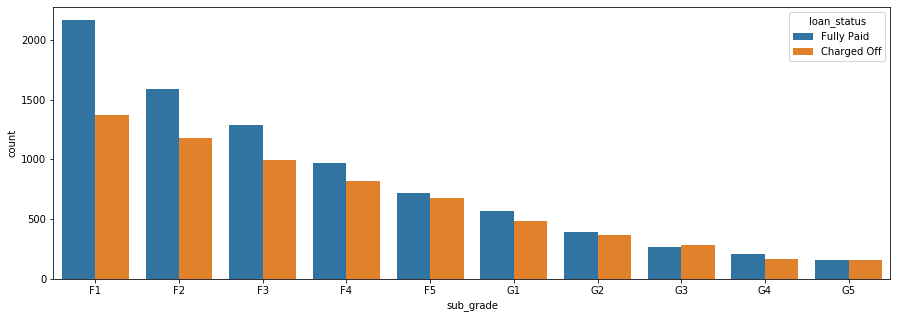

In [20]:
#Plot only borrower from grade 'F' and 'G'.
plt.figure(figsize=(15,5))
f_and_g = df[(df['grade']=='F') | (df['grade']=='G')]
fg_sorted_sub_grade = sorted(f_and_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=f_and_g,order=fg_sorted_sub_grade,hue='loan_status')

In [21]:
#Create a new column called 'loan_repaid' indicating 'loan_status'
df['loan_repaid'] = df['loan_status'].apply(lambda x: 1 if x=='Fully Paid' else 0)
df[['loan_status','loan_repaid']].head()

,loan_status,loan_repaid
0,Fully Paid,1
1,Fully Paid,1
2,Fully Paid,1
3,Fully Paid,1
4,Charged Off,0


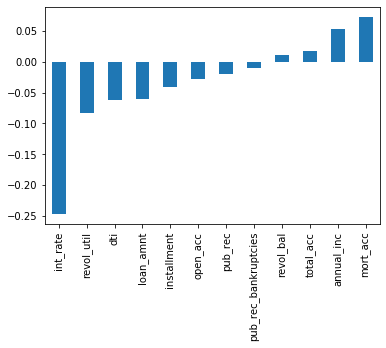

In [22]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot.bar()

# Section 2: Data Preprocessing

## Missing Data

In [23]:
#Check the length of the dataframe.
len(df)

396030

In [24]:
#Check the number of missing values in each column.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [25]:
#Check the percentage of missing values in each column.
df.isnull().mean()*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [26]:
#Check feature infomations.
feature_info('emp_title')
print('\n')
feature_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [27]:
#Check unique employment job titles
df['emp_title'].value_counts()

Teacher                      4389
Manager                      4250
Registered Nurse             1856
RN                           1846
Supervisor                   1830
                             ... 
Alta Vista Credit Union         1
Genetic counselor               1
Director Infrastructure         1
Director HCM Sales - East       1
Expotechnik                     1
Name: emp_title, Length: 173105, dtype: int64

In [28]:
#Drop the 'emp_title' column since there are too many (173105) unique titles to convert them into dummy variables.
df.drop('emp_title',inplace=True,axis=1)

In [29]:
#Check employment length.
sorted(df['emp_length'].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [30]:
#Sort the employment length order.
emp_length_order=['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

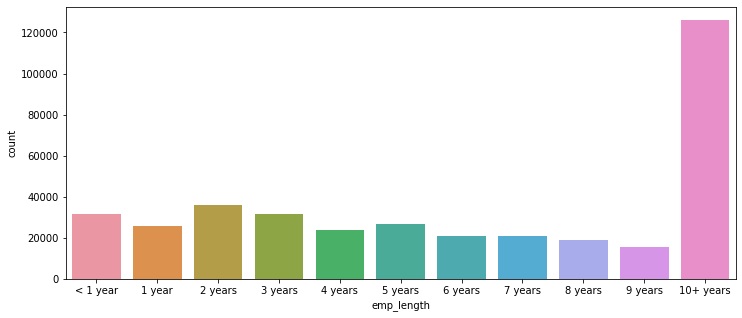

In [31]:
#Plot the count of different employment length.
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df,order=emp_length_order)

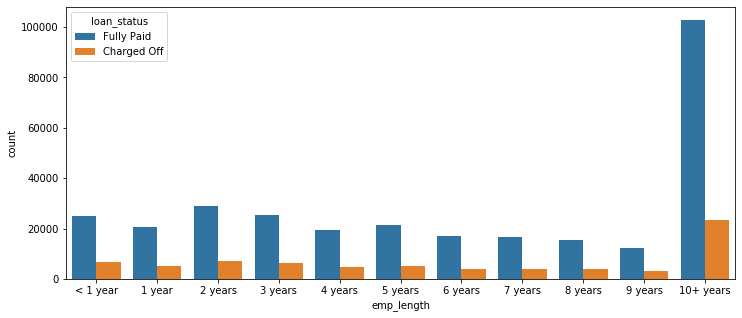

In [32]:
#Plot the count of different employment length, seperated by loan status.
plt.figure(figsize=(12,5))
sns.countplot(x='emp_length',data=df,hue='loan_status',order=emp_length_order)

In [33]:
#Calculate the percentage of charge offs per employment length category.
charge_off_rate = 1 - df.groupby('emp_length')['loan_repaid'].mean()
charge_off_rate

emp_length
1 year       0.199135
10+ years    0.184186
2 years      0.193262
3 years      0.195231
4 years      0.192385
5 years      0.192187
6 years      0.189194
7 years      0.194774
8 years      0.199760
9 years      0.200470
< 1 year     0.206872
Name: loan_repaid, dtype: float64

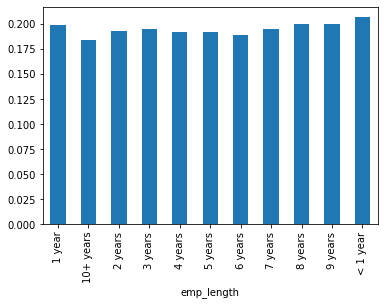

In [34]:
#Plot the percentage of charge offs per employment length category.
charge_off_rate.plot.bar()

In [35]:
#Drop the 'emp_length' column since the charge off rates are basically the same across all employment length.
df.drop('emp_length',axis=1,inplace=True)

In [36]:
#Check columns with missing values again.
df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1755
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
loan_repaid                 0
dtype: int64

In [37]:
#Check 'title' and 'purpose' column.
df[['title','purpose']].head(n=10)

,title,purpose
0,Vacation,vacation
1,Debt consolidation,debt_consolidation
2,Credit card refinancing,credit_card
3,Credit card refinancing,credit_card
4,Credit Card Refinance,credit_card
5,Debt consolidation,debt_consolidation
6,Home improvement,home_improvement
7,No More Credit Cards,credit_card
8,Debt consolidation,debt_consolidation
9,Debt Consolidation,debt_consolidation


In [38]:
#Drop 'title' column since it's just a description of 'purpose' column.
df.drop('title',axis=1,inplace=True)

In [39]:
#Check feature information
feature_info('mort_acc')

Number of mortgage accounts.


In [40]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [41]:
#Check correlation between 'mort_acc' and other columns.
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [42]:
#We can see that total_acc correlates the most with mort_acc.
#Check the mean of mort_acc per total_acc
mean_mort_acc_per_total_acc = df.groupby('total_acc')['mort_acc'].mean()
mean_mort_acc_per_total_acc

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
           ...   
124.0    1.000000
129.0    1.000000
135.0    3.000000
150.0    2.000000
151.0    0.000000
Name: mort_acc, Length: 118, dtype: float64

In [43]:
#We fill in missing values of mort_acc using the mean mort_acc value of the corresponding total_acc value.
df['mort_acc'].fillna(value=df['total_acc'].apply(lambda x: mean_mort_acc_per_total_acc.loc[x]),inplace=True)

In [44]:
#Check columns with missing values again.
df.isnull().sum()

loan_amnt                 0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
earliest_cr_line          0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util              276
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies    535
address                   0
loan_repaid               0
dtype: int64

In [45]:
#Since 'revol_util' and 'pub_rec_bankruptcies' have missing values of less than 0.2%.
#Simply just drop those rows with missing values on these two columns.
df.dropna(inplace=True)
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

## Categorical Variables and Dummy Variables

In [46]:
#Scratch all columns with non numeric value.
df.select_dtypes(exclude=['float64','int64']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [47]:
#Check 'term' column.
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [48]:
#Convert 'term' column into numeric values (36/60).
df['term'] = df['term'].apply(lambda x: 36 if '36 months' in x else 60)

In [49]:
#Drop 'grade' column since it's part of 'sub_grade' column.
df.drop('grade',axis=1,inplace=True)

In [50]:
#Convert 'sub_grade' into dummy variables.
#Concatenate the dummy variable columns into DataFrame.
sub_grade_dummy = pd.get_dummies(df['sub_grade'],drop_first=True)
df = pd.concat([df.drop('sub_grade',axis=1),sub_grade_dummy],axis=1)

In [51]:
#Convert 'verification_status', 'application_type', 'initial_list_status','purpose' column into dummy variables.
#Concatenate the dummy variable columns into DataFrame.
verification_status_dummy = pd.get_dummies(df['verification_status'],drop_first=True)
application_type_dummy = pd.get_dummies(df['application_type'],drop_first=True)
initial_list_status_dummy = pd.get_dummies(df['initial_list_status'],drop_first=True)
purpose_dummy = pd.get_dummies(df['purpose'],drop_first=True)
df = pd.concat([df,verification_status_dummy,application_type_dummy,initial_list_status_dummy,purpose_dummy],axis=1)
df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1,inplace=True)

In [52]:
#Check 'home_ownership' column
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [53]:
#Assign 'NONE' and 'ANY' into 'OTHER' category to reduce dummy variables.
#Convert 'home_ownership' into dummy variables.
#Concatenate the dummy variable columns into DataFrame.
df['home_ownership'] = df['home_ownership'].apply(lambda x: 'OTHER' if (x=='NONE') | (x=='ANY') else x)
home_ownership_dummy = pd.get_dummies(df['home_ownership'],drop_first=True)
df = pd.concat([df,home_ownership_dummy],axis=1)
df.drop('home_ownership',axis=1,inplace=True)

In [54]:
#Extract 'zip_code' from 'address' column.
df['zip_code'] = df['address'].apply(lambda x: x[-5:])
df['zip_code'].value_counts()

70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: zip_code, dtype: int64

In [55]:
#Convert 'zip_code' into dummy variables.
#Concatenate the dummy variable columns into DataFrame.
zip_code_dummy = pd.get_dummies(df['zip_code'],drop_first=True)
df = pd.concat([df.drop(['zip_code','address'],axis=1),zip_code_dummy],axis=1)

In [56]:
#Drop 'issue_d' column since we wouldn't know beforehand if the loan would be issued when using the model.
df.drop('issue_d',axis=1,inplace=True)

In [57]:
#Extract 'earliest_cr_year' from 'earliest_cr_line'.
#Drop the 'earliest_cr_line' column.
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x[-4:]))
df.drop('earliest_cr_line',axis=1,inplace=True)

In [58]:
#Drop 'loan_status' column since we have corresponding 'loan_repaid' column whose values are 0s and 1s.
df.drop('loan_status',axis=1,inplace=True)

## Train Test Split

In [59]:
#df.info()

In [60]:
#Import Scikit-Learn module
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [61]:
#Train_Test_Split dataset.
X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [62]:
X_train.shape

(316175, 78)

In [63]:
#Normalize the data.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Section 3: Creating and Fitting Model

## Create the Model

In [65]:
#Some useful imports regarding Deep Learning.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [66]:
#Create model instance.
model = Sequential()

#Add 4 layers including 1 input layer,2 hidden layers and 1 output layer.
#Add 3 corresponding Dropout layers.
model.add(Dense(units=78,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=40,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=20,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))

#Compile the model as a binary classification problem
model.compile(loss='binary_crossentropy',optimizer='adam')

In [67]:
#Set earlystopping to avoid overfitting.
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

## Fit the Model

In [68]:
#Fit the model.
model.fit(x=X_train,y=y_train,epochs=30,validation_data=(X_test,y_test),verbose=1,callbacks=[early_stop],batch_size=256)

Train on 316175 samples, validate on 79044 samples
Epoch 1/30
316175/316175 [==============================] - 4s 12us/sample - loss: 0.3399 - val_loss: 0.2673
Epoch 2/30
316175/316175 [==============================] - 3s 9us/sample - loss: 0.2747 - val_loss: 0.2652
Epoch 3/30
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2703 - val_loss: 0.2650
Epoch 4/30
316175/316175 [==============================] - 4s 11us/sample - loss: 0.2681 - val_loss: 0.2639
Epoch 5/30
316175/316175 [==============================] - 3s 11us/sample - loss: 0.2670 - val_loss: 0.2636
Epoch 6/30
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2662 - val_loss: 0.2639
Epoch 7/30
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2659 - val_loss: 0.2638
Epoch 8/30
316175/316175 [==============================] - 3s 10us/sample - loss: 0.2659 - val_loss: 0.2635
Epoch 9/30
316175/316175 [==============================] - 3s 10us/sample - l

In [69]:
#Save the model
from tensorflow.keras.models import load_model

model.save('my_model_Keras_Project_LendingClub.h5')

# Section 4: Evaluating Model Performance

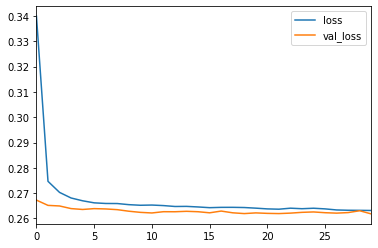

In [70]:
#Plot the validation loss versus the training loss
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [71]:
#Make predictions on X_test data.
predictions = model.predict_classes(X_test)

#Display classification report and confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 6721  8937]
 [    1 63385]]


              precision    recall  f1-score   support

           0       1.00      0.43      0.60     15658
           1       0.88      1.00      0.93     63386

    accuracy                           0.89     79044
   macro avg       0.94      0.71      0.77     79044
weighted avg       0.90      0.89      0.87     79044



In [72]:
#Given a random customer, predict the result
import random
random_ind = random.randint(0,len(df))
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]])

In [73]:
#Check the actual result
df.iloc[random_ind]['loan_repaid']

1.0